# Imports

In [1]:
import nina

import matplotlib.pyplot as plt
import numpy as np
from scipy import stats

# Cross-section

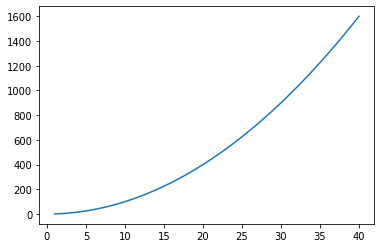

In [2]:
def xsec(Enu):
    return Enu**2

energy = np.linspace(1,40,50)
plt.plot(energy, xsec(energy))
pass

# Flux

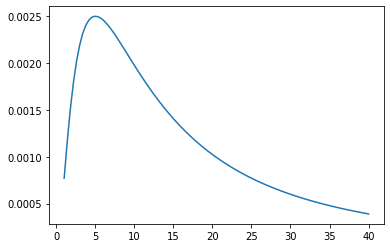

In [3]:
def flux(Enu):
    return 1/(5+Enu)**4

energy = np.linspace(1,40,100)
plt.plot(energy, flux(energy)*xsec(energy))
pass

# Prob

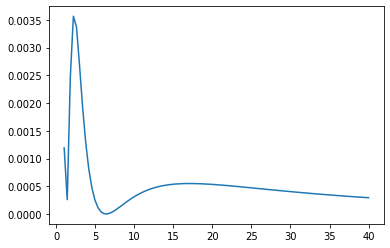

In [4]:
class ProbTeste(nina.Prob):
    def func(self, energy):
        return 1-self.params[0]*np.sin(self.params[1]*self.L/energy)

prob = ProbTeste([1,1], 10)


energy = np.linspace(1,40,100)
plt.plot(energy, flux(energy)*xsec(energy)*prob.calculate(energy))
pass

# Experiment

In [5]:
detector = nina.Detector( xsec = xsec, position = [0,0,0] )
source = nina.Source( flux = flux, position = [10,0,0] )
histogram = nina.Histogram.getUniform(1,10,10)

kamland = nina.Signal( detector, source, prob, histogram)
kamland.norm = 10**7
events = kamland.simulate()

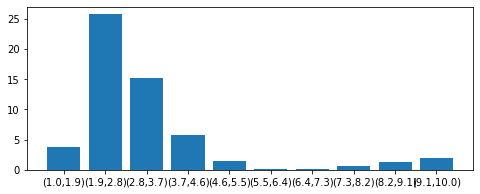

In [6]:
bins = [f"({round(bin.min,1)},{round(bin.max,1)})" for bin in histogram.bins]
plt.figure(figsize=(8,3))
plt.bar(bins, events)
pass

# Analysis

## Fake events

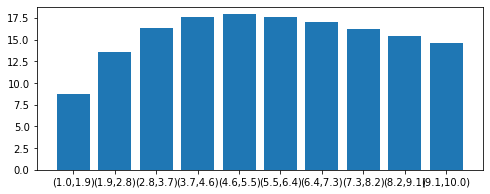

In [7]:
kamland.prob.params=[0,0]
fake_events = kamland.simulate()

bins = [f"({round(bin.min,1)},{round(bin.max,1)})" for bin in histogram.bins]
plt.figure(figsize=(8,3))
plt.bar(bins, fake_events)
pass

## Chi-square

In [8]:
dist = []
for lam in fake_events:
    dist.append(np.random.poisson(lam,size=10000))

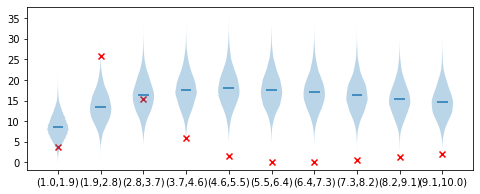

In [9]:
plt.figure(figsize=(8,3))
plt.scatter(bins, events, color='r', marker="x")
plt.violinplot(dist, positions=range(len(events)), showmeans=True, showextrema=False)
pass

X2 = sum (x-traco)**2/traco

DX(2)=X2(10+2)-Xmin(10)